<a href="https://colab.research.google.com/github/omoniyitoluwani35/predict_health_costs_with_regression/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

dataset.tail()

--2023-04-01 12:27:28--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-04-01 12:27:29 (10.7 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:

dataset.shape,dataset.describe

((1338, 7),
 <bound method NDFrame.describe of       age     sex   bmi  children smoker     region  expenses
 0      19  female  27.9         0    yes  southwest  16884.92
 1      18    male  33.8         1     no  southeast   1725.55
 2      28    male  33.0         3     no  southeast   4449.46
 3      33    male  22.7         0     no  northwest  21984.47
 4      32    male  28.9         0     no  northwest   3866.86
 ...   ...     ...   ...       ...    ...        ...       ...
 1333   50    male  31.0         3     no  northwest  10600.55
 1334   18  female  31.9         0     no  northeast   2205.98
 1335   18  female  36.9         0     no  southeast   1629.83
 1336   21  female  25.8         0     no  southwest   2007.95
 1337   61  female  29.1         0    yes  northwest  29141.36
 
 [1338 rows x 7 columns]>)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset['smoker'].replace(['yes','no'],[1,0], inplace= True)
dataset['sex'].replace(['male','female'],[1,0], inplace= True)
dataset['region'].replace(['southeast','southwest','northwest','northeast'],[0,1,2,3], inplace= True)

In [8]:
dataset['region'].value_counts()

0    364
1    325
2    325
3    324
Name: region, dtype: int64

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,0,1725.55
2,28,1,33.0,3,0,0,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [14]:
model = keras.Sequential([
                          layers.Dense(2),
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

In [15]:
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 10391.5400 - mae: 10391.5400 - mse: 264325328.0000 - val_loss: 3265.6428 - val_mae: 3265.6428 - val_mse: 18082160.0000
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 1044.8711 - mae: 1044.8711 - mse: 2835505.7500 - val_loss: 664.0955 - val_mae: 664.0955 - val_mse: 677956.5000
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 447.9699 - mae: 447.9699 - mse: 471827.2812 - val_loss: 1238.5261 - val_mae: 1238.5261 - val_mse: 2801215.5000
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 652.2766 - mae: 652.2766 - mse: 1128570.2500 - val_loss: 402.2991 - val_mae: 402.2991 - val_mse: 325142.2500
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 344.2075 - mae: 344.2075 - mse: 306760.6875 - val_loss: 460.9158 - val_mae: 460.9158 - val_mse: 332150.3125
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 302

9/9 - 0s - loss: 711.8707 - mae: 711.8707 - mse: 886516.6250 - 116ms/epoch - 13ms/step
Testing set Mean Abs Error: 711.87 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


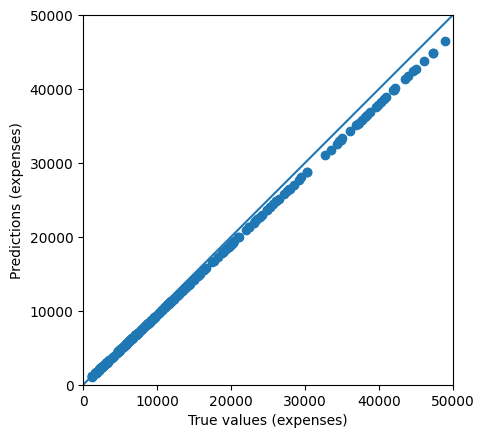

In [16]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)